# Criticality and Cascades

#### Table of Contents:
1. Up-down states in the cerebral cortex
2. Critical cascade in a (neural) network
3. The equilibrium parameter

#### Learning Goals
1. Understand what criticality is and how it arises.
2. Know where criticality appears in nature and how it might applied.

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

## A model for critical cascades

### Why make computer model?

These phenomena in the cortex lend themselves to research *in-silico*, using computers to simulated groups of neurons. Such simulations allow researchers precise control over various parameters, such as the number of neurons, how they are connected, and the strength of those connections. Using this control, these parameters can be precisely manipulated investigate how they influence the occurrence, propagation, and characteristics of criticality. As you might know, such control is difficult to achieve in biological experiments.

One of the main goals for researchers in this field is the development of mathematical models and theories about neural processes like the emergence of critical cascades. Simulations provide a means to rigorously test these hypotheses and models. By creating computational models based on their theoretical understanding of neural avalanches, researchers can validate their model by comparing their predictions to the real thing. Such models often allow for much deeper insights into the dynamics of neural avalanches.

### The Leaky Integrate and Fire Neuron
There are various types artificial neural network one category being **spiking neural networks (SNNs)**. These networks model the behavior of individual neurons and their interactions through action potentials or **spikes**, similar to real neurons in the brain.

**Leaky Integrate and Fire (LIF)** neurons are a type of biological neuron model used to build SNNs. LIF neurons are frequently employed in research due to their simplicity and ability to capture essential neural dynamics. LIF neurons operate by continuously integrating incoming electrical signals over time, with a gradual leakage of charge. When the accumulated charge reaches a predefined firing threshold, the neuron generates a spike, representing the firing of an action potential. Following a spike, the neuron resets, simulating the refractory period observed in real neurons.

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
> 
> The code below defines a working LIF neuron written and simulated using the [Brain Simulator](https://briansimulator.org/) package. Run the code below to setup a single LIF neuron, which recieves an input pulse at 20, 60, and 80 m.

In [2]:
defaultclock.dt = 0.1 * ms

neuron = NeuronGroup(1,
                      """
                      dv/dt = -v/tau : volt (unless refractory)
                      """,
                      threshold="v > theta",
                      reset="v = V_r",
                      refractory=2 * ms,
                      method="exact",
)

# Input spike paramaters
times = array([20, 60, 80]) * ms

inp = SpikeGeneratorGroup(1,np.zeros_like(times), times)
input_synapse = Synapses(inp, neuron, on_pre="v += strength", delay=0 * ms)
input_synapse.connect()

# Record voltage
voltage_monitor = StateMonitor(neuron, 'v', record=True)

store()

> <p style="color:blue;"><font size="3"> 🖥️ Demo  </font></p>
> 
> The code above only needs to be run once. The model is stored using the `store` function in the last line of the code above. Now, using the code below, the model is given parameters and simulated for 100 ms, after which the three resulting spikes are plotted. Note that the parameter `strength` can be changed, changing the strength of the pulses applied to the neuron. Try increasing and decreasing this value. Also consider comparing it to `theta`, i.e. what happens if `strength` > `theta` and vice-versa?

Text(0, 0.5, 'Voltage [mV]')

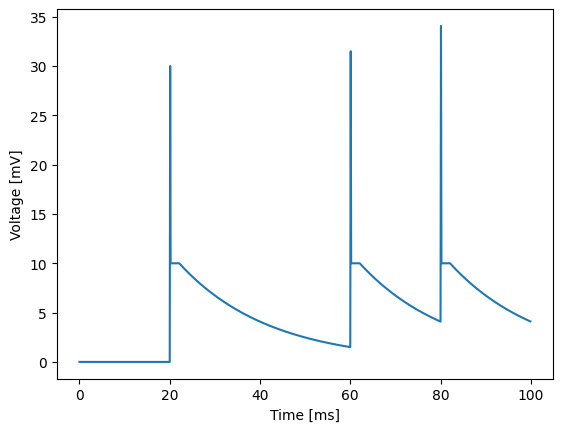

In [3]:
# neuron parameters
tau = 20 * ms
theta = 20 * mV
V_r = 10 * mV

# Input parameters
strength = 30 * mV

restore()

# Run for 100 ms
run(100 * ms)

plt.plot(voltage_monitor.t / ms, voltage_monitor.v.T / mV)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [mV]')


LIF neurons are favored in research because of their computational efficiency and mathematical tractability, which make them suitable for simulating large-scale neural networks and studying fundamental principles of information processing. By adjusting parameters like the leak rate and firing threshold, LIF neurons can be fine-tuned to reproduce various neural behaviors. These neurons can then be assembled into networks can perform tasks ranging from signal processing, to memory storage, and pattern recognition, offering insights into the computational capabilities of the brain.

## Recurrent Neural Networks

<center>
<figure>
<img src="images/recurrent_neural_network_kanders.png" style="width:80%">
<figcaption align = "center"><i> Recurrent Neural Network. Adapted from Kanders et. al. </i></figcaption>
</figure>
</center>


In [4]:
from utils.simulate import RecurrentNeuralNetwork

In [5]:
rnn = RecurrentNeuralNetwork(n=1000)
rnn.store()

In [6]:
rnn.set_w(11)
rnn.sim(1200)

Starting simulation at t=0. s for a duration of 1.2 s
1.2 s (100%) simulated in 1s


1

In [ ]:
rnn.plot_voltage()

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: xlabel='Time [ms]', ylabel='Neuron'>,
        <Axes: ylabel='Voltage [mV]'>], dtype=object))

In [ ]:
Gedenkt door andere teams:
- Wat zijn up/down states
- Wat is de biological function (in slaap)
- Simuleren met potential spikes
- Modeleren met neuronen en kijken naar spikes

## AI Statement

## References